<h1>Project D4.5</h1>
<p>Esta projeto é dividido em três partes<p>
<p><ul>
    <li>A <a href="#topico-1">primeira parte</a> os dados são explorados com a biblioteca Pandas</li>
    <li>A <a href="#topico-2">segunda parte</a> explora graficamente os dados com matplotlib</li>
    <li>
        A <a href="#topico-3">terceira parte</a> os dados são usados para testar uma implementação do algoritmo C4.5
        <ul>
            <li><a href="#topico-31">Implementação do Algoritmo 6.1</a></li>
            <li><a href="#topico-32">Implementação do algoritmo para divisão da arvore</a></li>
        </ul>
    </li>
</ul></p>
    
<h3> Informações sobre o conjunto de dados </h3>
<p>This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.</p>
   <p><ul><li>Title: Breast cancer data (Michalski has used this)</li>
    <li>Sources: 
        <ul><li>-- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
            Ljubljana, Yugoslavia</li>
   <li>-- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)</li>
            <li>-- Date: 11 July 1988</li></ul>
    </li>
<li>Attribute Information:
   <ul><li>1. Class: no-recurrence-events, recurrence-events</li>
   <li>2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.</li>
   <li>3. menopause: lt40, ge40, premeno.</li>
   <li>4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.</li>
   <li>5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.</li>
   <li>6. node-caps: yes, no.</li>
   <li>7. deg-malig: 1, 2, 3.</li>
   <li>8. breast: left, right.</li>
  <li> 9. breast-quad: left-up, left-low, right-up,	right-low, central.</li>
       <li>10. irradiat:	yes, no.</li></ul></li>

</ul></p>

<hr>
<h4>Coisas que eu ainda quero explorar</h4>
<ul>
    <li>Cálculo de erro computacional durante a montagem dos classificadores</li>
    <li>Um modelo matemático mais refinado da teoria de arvores de decisão</li>
    <li>Um modelo matemático para determinar a quatidade de dados que é passada para cada etapa de uma criação de arvore</li>
    <li>Quando ou quais as condições para parar (<i>stop</i>) a recursão em uma arvore</li>
    <li>Como compor o último nó de uma arvore</li>
    <li>Ordenar os atributos baseados em seu ganho de informação colocando o melhor caminho sempre a direita</li>
    <li>Arvores de Decisão Ponderadas -> usar no cálculo de ganho de informação um peso atribuido por especilista do dominio para decisão da importância dos nós</li>
</ul>

<p>Importando as bibliotecas necessárias</p>

In [1]:
import pandas as pd
import sys as os
import matplotlib.pyplot as plt
%matplotlib inline

# os.getsizeof(data_frame_training[label]):

<h2><a name="topico-1">1. Explora os dados usando o Pandas</a></h2>

<p>Cria o data frame a partir do arquivo de dados indicado</p>
<p><strong>Obs.:</strong> Apesar de estar salvo com uma extensão .data o arquivo é codificado no formato csv</p>

In [2]:
# Data Frame for Breast Cancer
df_bc = pd.read_csv('breast-cancer.data')

<p>Exibe os primeiros registros do arquivo de dados</p>

In [30]:
df_bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


<p>Como o conjuto de dados não tem definido no arquivo os nomes das colunas o seguinte código é usado</p>

In [9]:
labels = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df_bc = pd.read_csv('breast-cancer.data', names=labels)
df_bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


<p>Obtém uma tupla com as dimensões do Data Frame

In [10]:
df_bc.shape

(286, 10)

<p>Analisa quais os tipos de dados atribuidos a cada coluna do conjunto de dados</p>

In [11]:
df_bc.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

<p>Obtém um resumo do Data Frame obtido através do conjunto de dados</p>

In [12]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


<p>Analisa o número de valores únicos por cada coluna</p>

In [13]:
df_bc.nunique()

class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
dtype: int64

<p>Obtém estatisticas descritivas para cada coluna do conjunto de dados</p>
<p><strong>Obs.:</strong> Aplicável somente a tipos numéricos</p>

In [14]:
df_bc.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<p>Cria um Data Frame com os dados que tenham a classe no-recurrence-events</p>

In [17]:
df_bc_nre = df_bc[df_bc['class'] == 'no-recurrence-events']
df_bc_nre.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


<p>Cria um Data Frame com os dados que tenham a classe recurrence-events</p>

In [18]:
df_bc_re = df_bc[df_bc['class'] == 'recurrence-events']
df_bc_re.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
201,recurrence-events,50-59,premeno,15-19,0-2,no,2,left,left_low,no
202,recurrence-events,40-49,premeno,40-44,0-2,no,1,left,left_low,no
203,recurrence-events,50-59,ge40,35-39,0-2,no,2,left,left_low,no
204,recurrence-events,50-59,premeno,25-29,0-2,no,2,left,right_up,no
205,recurrence-events,30-39,premeno,0-4,0-2,no,2,right,central,no


<p>Explora os dois Data Frames obtidos</p>

In [23]:
length_reg_bc = df_bc.shape[0]
length_reg_bc_nre = df_bc_nre.shape[0]
length_reg_bc_re = df_bc_re.shape[0]
print("Length\n\tTotal lines Data Frame original: " + str(length_reg_bc))
print("\tTotal lines Data Frame class no-recurrence-events: " + str(length_reg_bc_nre))
print("\tTotal lines Data Frame class recurrence-events: " + str(length_reg_bc_re))
print("Sum for register: " + str(length_reg_bc_nre + length_reg_bc_re))

proportion_class_nre = (length_reg_bc_nre / length_reg_bc) * 100
proportion_class_re = (length_reg_bc_re / length_reg_bc) * 100
msg = 'Proportion class for no-recurrence-events = {} and recurrence-events = {}'
print(msg.format(str(proportion_class_nre), str(proportion_class_re)))

Length
	Total lines Data Frame original: 286
	Total lines Data Frame class no-recurrence-events: 201
	Total lines Data Frame class recurrence-events: 85
Sum for register: 286
Proportion class for no-recurrence-events = 70.27972027972028 and recurrence-events = 29.72027972027972


<p>Analisa o conjunto de dados original e verifica se existem dados duplicados</p>

In [24]:
df_bc.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268     True
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280     True
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool

<p>Obtém então o quantitativo de dados duplicados</p>

In [25]:
sum(df_bc.duplicated())

14

<p>Cria uma cópia do Data Frame e então remove dele todos os registros duplicados</p>

In [32]:
df_bc_rmduplicated = df_bc.loc[:,'class':'irradiat']
df_bc_rmduplicated.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [34]:
df_bc_rmduplicated.drop_duplicates(inplace=True)
df_bc_rmduplicated.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [36]:
count_original_bc = df_bc.shape[0]
count_copy_bc = df_bc_rmduplicated.shape[0]
msg = "Count\tOriginal = {}\tCopy = {}\tDiff = {}"
print(msg.format(str(count_original_bc), str(count_copy_bc), str(count_original_bc-count_copy_bc)))

Count	Original = 286	Copy = 272	Diff = 14


In [3]:
df_bc .describe()

,3
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<h2><a name="topico-2">2. Constrói algumas visualizações com matplolib</a></h2>
<p>Primeiro separa os dados sem os registros dujplicados por sua classe</p>

In [44]:
df_class_all = df_bc_rmduplicated.iloc[:,0:]
df_class_nre = df_bc_rmduplicated[df_bc_rmduplicated['class'] == 'no-recurrence-events']
df_class_re = df_bc_rmduplicated[df_bc_rmduplicated['class'] == 'recurrence-events']

msg = "Total for clean data frame = {}\tTotal class NRE = {}\tTotal class RE = {}"
print(msg.format(str(df_class_all.shape[0]), str(df_class_nre.shape[0]), str(df_class_re.shape[0])))

Total for clean data frame = 272	Total class NRE = 191	Total class RE = 81


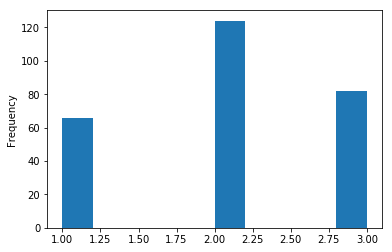

In [52]:
df_class_all['deg-malig'].plot(kind='hist')

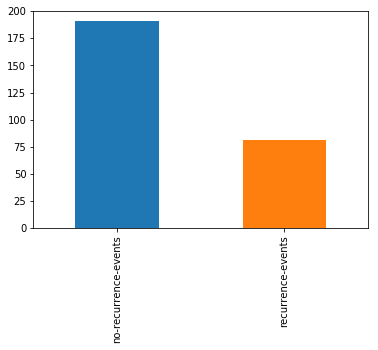

In [55]:
ind = df_class_all['class'].value_counts().index
df_class_all['class'].value_counts()[ind].plot(kind='bar')

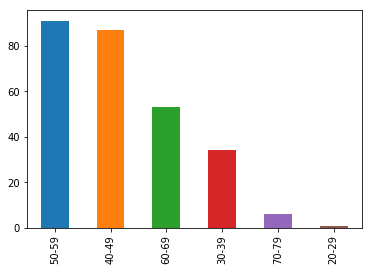

In [56]:
ind = df_class_all['age'].value_counts().index
df_class_all['age'].value_counts()[ind].plot(kind='bar')

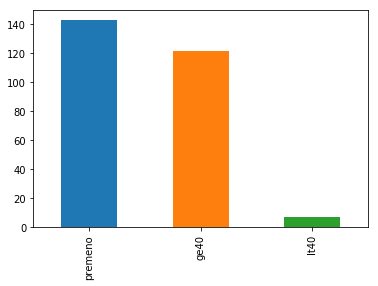

In [57]:
ind = df_class_all['menopause'].value_counts().index
df_class_all['menopause'].value_counts()[ind].plot(kind='bar')

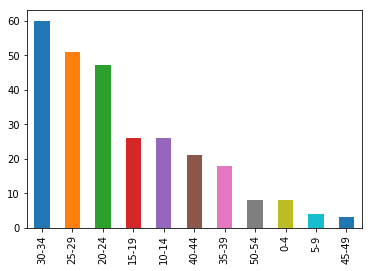

In [58]:
ind = df_class_all['tumor-size'].value_counts().index
df_class_all['tumor-size'].value_counts()[ind].plot(kind='bar')

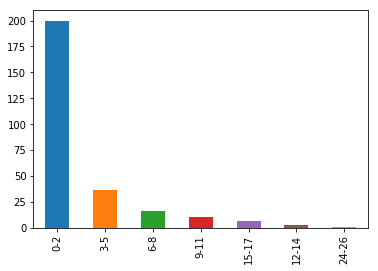

In [60]:
ind = df_class_all['inv-nodes'].value_counts().index
df_class_all['inv-nodes'].value_counts()[ind].plot(kind='bar')

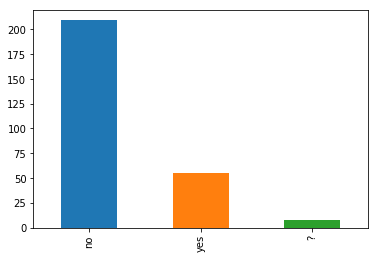

In [62]:
ind = df_class_all['node-caps'].value_counts().index
df_class_all['node-caps'].value_counts()[ind].plot(kind='bar')

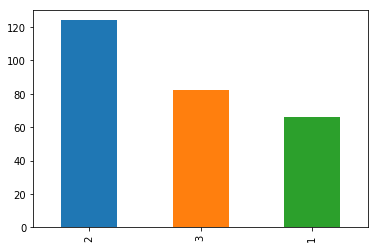

In [63]:
ind = df_class_all['deg-malig'].value_counts().index
df_class_all['deg-malig'].value_counts()[ind].plot(kind='bar')

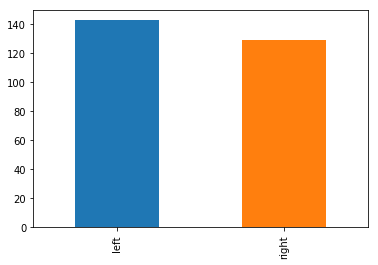

In [64]:
ind = df_class_all['breast'].value_counts().index
df_class_all['breast'].value_counts()[ind].plot(kind='bar')

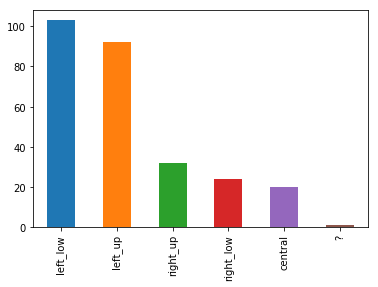

In [65]:
ind = df_class_all['breast-quad'].value_counts().index
df_class_all['breast-quad'].value_counts()[ind].plot(kind='bar')

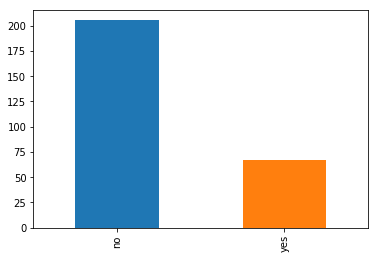

In [66]:
ind = df_class_all['irradiat'].value_counts().index
df_class_all['irradiat'].value_counts()[ind].plot(kind='bar')

<h2><a name="topico-3">3. Implementação para o C4.5</a></h2>
<p>Deste ponto em diante o conjunto de dados trabalhado até então será usado para criar ae testar a implementação do algoritmo C4.5</p>
<hr>

<p>A função a seguir é uma possível implementação deste algoritmo.</p>

![Algoritmo 6.1](algoritmo_61.png)

<p>Considerando que a forma como o algoritmo está sendo apresentado esta possível implementação leva em conta as seguintes observações</p>
<p><ol>
    <li>. A arvore construída é feita recursivamente</li>
    <li>. A arvore é binária</li>
    <li>. O algoritmo tem comportamento <i>guloso</i></li>
</ol></p>

<h3><a name="topico-31">3.1 Implementação do Algoritmo 6.1</a></h3>

<h4>Pseudo-código proposto</h4>
<pre>

<blockquote>
@Todo Esta função simboliza o critério de divisão do algoritmo, no caso do C4.5 deve ser 
implementado os procedimentos para cálculo de ganho de informação e entropia
</blockquote>
<strong>funcao</strong> <i>"DividirArvoreDecisao"</i> ( dadosTreinamento: <u>Object</u> ): <strong>Object</strong>
<strong>Inicio</strong>
    Obtém a <i>lista de atributos</i> do <i>dadosTreinamento</i>
    <strong>Para</strong> cada <i>atributo</i> na <i>lista de atributos</i>
        Calcule o critério de divisão
        Guarde o <i>critério de divisão</i> encontrado em <i>lista de critérios</i>
    <strong>Fimpara</strong>
    Procure em <i>lista de critérios</i> qual o maior valor encontrado
    Retorne o <i>nome do atributo</i> com maior <i>critério de divisão</i>
<strong>Fim</strong>

<blockquote>
@Todo: Esta função pode ser alterada para incluir varios critérios de paradas bastando ter um 
parâmetro que indenfique qual critério será utilizado e no interior da função uma estrutura de 
seleção multipla escolha pode ser  utilizada para definir qual o critério a ser executado. No caso 
abaixo  estamos apenas verificando que caso seja o último nó da lista então a  função deve ser 
parada. Contudo, outro critério de parada pode ser  utilizado, como também múltiplos critérios 
podem ser adotados.
</blockquote>
<strong>funcao</strong> <i>"CriterioParada"</i> ( dadosTreinamento: <u>Object</u> ): <strong>Bool</strong>
<strong>Var</strong>
    tamanho: <strong>Inteiro</strong>
<strong>Inicio</strong>
   tamanho = Conte o tamanho de <i>atributosConjuntoTreinamento</i>
   <strong>Se</strong> (tamanho == 1) <strong>Entao</strong>
       <strong>Retorne True</strong>
   <strong>Senao</strong>
       <strong>Retorne False</strong>
<strong>Fim</strong>

<blockquote style="text-align: justify; word-wrap: normal; hyphens=auto">
@Todo 1. Na primeira instrução Se somente duas partições são formadas por vez de execução 
do algoritmo, visto que a arvore de decisão em questão é uma arvore binária. De outra forma, o 
espaço de procura é dividido  por dois, sucessivamente e em cada parte até se alcan~çar a condição 
de parada.
</blockquote>
<blockquote style="text-align: justify; word-wrap: normal; hyphens=auto">
@Todo 2. Por se tratar de uma função de chamada recursiva a ordem que está representada no algoritmo
abaixo significa que a arvore crescerá a direita até o fim e sem seguida ao retornar crescecerá a 
direita.
</blockquote>
<blockquote style="text-align: justify; word-wrap: normal; hyphens=auto">
@Todo 3. Cada nó da arvore (sem exceção) tem a mesa estrutura que varia unicamente em função de ser
um nó folha ou um nó ramo, a indicação de ser nó folha ou ramo é feita pelo  campo 'leaf'; para um
<u>nó raiz</u> ou tronco <u>sua composição é 'label (nome do atributo), test_condition (qual a regra  de 
divisão naquele nó), leaf=False, right (aponta para a subarvore a direita e left (aponta para a 
subarvore  esquerda)'</u>; para um <u>nó folha</u> é <u>composta por 'label, leaf=True, test_condition 
(qual a regra  de  conclusão naquele nó) e class (classe  resultante da regra de decisão formada na arvore)'</u>
</blockquote>
<blockquote style="text-align: justify; word-wrap: normal; hyphens=auto">
@Todo 4. Múltiplos critérios de parada podem ser utilizados no corpo de função para isto basta incluir
novos blocos <strong>Senão..Se</strong> bastando usar a função <i>CriterioParada</i> alterada ou outra 
função adequada para definir a ideia.
</blockquote>
<blockquote style="text-align: justify; word-wrap: normal; hyphens=auto">
@Todo 5. Poderia ser interessante adicionar uma função que verificava se o nó a ser adicionado na arvore
é interessante talvez, talvez uma função que olhasse o atributo anterior e o atual e tentasse fazer um 
comparativo da importância daquele nó na arvore. Ou, ao invés de eliminar o nó manter um registro na 
estrutura do nó da probabilidade daquele caminho levar a algum lugar, facilitando um percurso de
tomada de decisão
</blockquote>
<strong>funcao</strong> <i>"GerarArvoreDecisao"</i> ( dadosTreinamento: <u>Object</u> ): <strong>Object</strong>
<strong>Var</strong>
    root, leafEnd: <strong>Object</strong>
    particao: <strong>Matriz</strong>
    atributo, classe: <strong>Literal</strong>
<strong>Inicio</strong>
    <strong>Se</strong> ( CriterioParada(<i>dadosTreinamento</i>) == <strong>True</strong> ) <strong>Entao</strong>
        <strong>Inicio</strong>
            &#35;&#35; Para de expandir a arvore
            atributo = Obtem <i>atributo</i> de <i>dadosTreinamento</i>
            classe = Identifica a classe resultante em <i>atributo</i>
            leafEnd = <strong>array</strong>('label' => <i>atributo</i>,
                             'test_condition' => <i title="Determinado de acordo com o atributo avaliado"><u>condition</u></i>
                             'leaf' => <strong>True</strong>,
                              'class' => <i>classe</i> )
            Retorne <i>leafEnd</i>
        <strong>FimSe</strong>
    &#35;&#35; Caso a parada não seja necessária o algoritmo segue executando fazendo as divisões do conjunto
    atributo = <i>DividirArvoreDecisao</i>( <i>dadosTreinamento</i> )
    particao&#91;'left'&#93; = Copia de 0 ate <i>atributo</i> de divisao de <i>dadosTreinamento</i>
    particao&#91;'right'&#93; = Copia de <i>atributo</i> de divisao ate o fim de <i>dadosTreinamento</i>
    root = <strong>array</strong>('label' => <i>atributo</i>,
                 'test_condition' => <i title="Determinado de acordo com o atributo avaliado"><u>condition</u></i>
                 'leaf' => <strong>False</strong>,
                 'left' => <strong>array</strong>(),
                 'right' => <strong>array</strong>() )
    <i>root[left]</i> = GerarArvoreDecisao( <i>particao&#91;'left'&#93;</i> )
    <i>root[right]</i> = GerarArvoreDecisao( <i>particao&#91;'right'&#93;</i> )
    Retorne <i>root</i>
<strong>Fim</strong>

<blockquote>@Todo Programa principal</blockquote>
<strong>Algoritmo</strong> <i>"MainArvoreDecisao"</i>
<strong>Var</strong>
    arvore, dataFrame: Object
<strong>Inicio</strong>
    dataFrame = Leia os <u>dados de treinamento</u>
    arvore = GerarArvoreDecisao( dataFrame )
    Exiba <i>arvore</i>
<strong>Fim</strong>
</pre>

<p>A implementação abaixo já começa a ser o esboço do pseudo código em Python</p>
<p>Observe que nem tudo está definido pois o pseudo código acima ainda está em um nível mais fácil para compreensão do que implementação</p>
<p>Há a existência de duas estrutura de dados necessárias, uma para representar o tronco e outra para a folha, porém ao contrário da Linguagem C que possui o <i>struct</i> em Python usamos uma classe vazia para simular esta mesma características</p>
<p>Alternativamente outras estruturas de dados do Python foram cogitadas, mas por uma questão de clareza no código não foram utilziadas. Por exemplos, listas por Python não se preocupar com indexação e ordem em listas, tuplas, por contarem valores que não podem ser modificados depois de serem criados, dicionários, que sendo próximos ao que queriam são usados para representar estrutura de dados bi-dimensionais, tais como tabelas</p>
<p>Outras bibliotecas já produzidas poderiam ser utilziadas, porém a intenção neste momento, é buscar uma implementação mais pura e próxima do algoritmo que estamos <u>decifrando</u>, assim fica mais fácil para entender se o algoritmo está tendo o compirtamento que esperamos pela forma que o escrevemos e obviamente se o portassemos para outra linguagem conseguiriamos reproduzi-lo com os mesmos resultados</p>
<p>Após este momento implementando nativamente com os recursos da linguagem poderemos dedicar a buscar recursos e/ou bibliotecas existentes que possam otimizar e/ou potencializar a execução de nosso algoritmo tornando-o mais eficiente</p>

In [8]:
def splitDecisionTree(trainningData):
    """
    Esta e a função pra dividir uma arvore de decisão
    Input: Dados de Treinamento
    Output: Ponto de divisão
    """
    pass


def gaugeStopRecursion( trainningData ):
    """ 
    Esta função determina quando a recursividade da arvore deve parar para a expansão
    Input: Dados de treinamento
    Output: (Bool) True = Stop, False = Continue
    """
    pass


def getAttribFromDataTrainning(trainningData):
    """Extrai o rótulo de um atributo dos dados de treinamento"""
    pass


def identifyClass(trainningData):
    """Identifica qual a classe para determinado atributo"""
    pass

def trunkCondition(trainningData):
    """Retorna qual a regra a ser aplicada em determinado tronco da arvore"""
    pass

def copyDataFrame(trainningData, begin, end):
    """Retorna uma parte do conjunto de dados mapeando em colunas e linhas"""
    pass

class Struct:
    def __init__(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self, k, v)
    
class StructNode(Struct):
    pass

def genderDecisionTree(trainningData):
    if gaugeStopRecursion(trainningData):
        atributo = getAttribFromDataTrainning(trainningData)
        classification = identifyClass(trainningData)
        tc = trunkCondition(trainningData)
        leafEnd = StructNode(label = atributo, test_condition = tc, leaf = True, classification = '')    
        return leafEnd
    # else
    attribPointDivision = splitDecisionTree(trainningData)
    tc = trunkCondition(trainningData)
    left_partition = copyDataFrame(trainningData, 0, attribPointDivision)
    right_partition = copyDataFrame(trainningData, attribPointDivision, -1)
    leafRoot = StructNode(label = attribPointDivision, test_condition = tc, leaf = False, left = NULL, right = NULL)
    
    leafRoot.left = genderDecisionTree(left_partition)
    leafRoot.right = genderDecisionTree(right_partition)
    return leafRoot

# Main implementation
# Neste ponto deveria ser implementado o programa principal, 
# porém como a funções acima não está operacional então não faz sentido 
# implementar esta parte do código
# Ocorrendo então após as funções acima estarem maduras o suficiente

<h3><a name="topico-32">3.2 Implementação do algoritmo para divisão da arvore</a></h3>

<blockquote>
<pre>
<blockquote>@Todo Esta função simboliza o critério de divisão do algoritmo, no caso do C4.5 deve ser 
implementado os procedimentos para cálculo de ganho de informação e entropia
</blockquote>
<strong>funcao</strong> <i>"DividirArvoreDecisao"</i> ( dadosTreinamento: <u>Object</u> ): <strong>Object</strong>
<strong>Inicio</strong>
    Obtém a <i>lista de atributos</i> do <i>dadosTreinamento</i>
    <strong>Para</strong> cada <i>atributo</i> na <i>lista de atributos</i>
        Calcule o critério de divisão
        Guarde o <i>critério de divisão</i> encontrado em <i>lista de critérios</i>
    <strong>Fimpara</strong>
    Procure em <i>lista de critérios</i> qual o maior valor encontrado
    Retorne o <i>nome do atributo</i> com maior <i>critério de divisão</i>
<strong>Fim</strong>
    </pre>

<p>Até o momento a proposta para a divisão dos nos das arvores se baseiam em usar algum método ou critério</p>
<p>Este método ou critério deve observar os atributos avaliados e decidir qual maximza a busca</p>
<p>Maximar a busca é escolher o mais significativo dos atributos no momento da avaliação</p>
<p>Contudo os procedimentos para esta divisão podem ser entendidos com os seguintes pontos</p>
<p>
    <ul>
        <li>A função para dividir uma arvore é chamada dentro de um procedimento principal que é executado recursivamente</li>
        <li>Cada vez que a função é chamada ele recebe um subconjunto dos dados</li>
        <li>A partir deste subconjunto a função determina qual dos atributos é o "mais significante"</li>
        <li>O atributo mais significante é o que possiblita um maior ganho de informação</li>
        <li>Quanto maior o ganho de informação então menor é o caminho formado na árvore de decisão para se chegar a uma folha</li>
        <li>Cada atributo de um conjuto de dados pode ser avaliado de forma binária</li>
        <li>Este forma binária indica que um atributo pode basicamente ser avaliado em uma forma "Sim/Não"</li>
        <li>Esta forma Sim/Não nada mais indica qual a probabilidade de algo acontecer, no caso, do atributo determinar a classe</li>
        <li>Esta probabilidade também é influencia pelo atributo antecessor, em outras palavras, seria como dizer "Considerando o atributo antecessor qual a probabilidade da classe ser A ou qual a probabilidade da classe ser B"</li>
        <li>Além de considerar o atributo antecessor é necessário achar numa forma de avaliar a probabilidade de acontecer o "Sim/Não" ou "A/B</li>
        <li>Para avaliar a probabilidade então o "Sim/Não" é avaliado de forma binária mais uma vez</li>
        <li>Essa segunda avaliação é feita olhando para os dados</li>
        <li>É através dos dados que aprendemos, então, são os dados que nos dão as resposta</li>
        <li>Assim, observando os dados, conta-se a probabilidade para sim e não em cada caso</li>
        <li>A probabilidade "Sim/Não" conjecturada até aqui é na verdade a frequência de valores que ocorrem para determinado atributo</li>
        <li>A probabilidade avaliada mais uma vez, conjectura também aqui, é na verdade a probabilidade de cada item da frequencia avaliada ocorrer</li>
        <li>em problemas de aprendizados é muito comum acontecer de não termos todas as atributos necessários para classificarmos totalmente um conjunto de dados.</li>
    </ul>
</p>

<p>A função abaixo calcula a entropia para um conjunto de dados</p>

![Formula calculo Entropia](formula_calculo_entropia.png)

![Formula calculo Entropia](formula_calculo_entropia_2.png)

<p><i>p</i> é a proporção de exemplos em relação a todo conjunto </p>
<p><i>q</i> é o total de instâncias no conjunto</p>
<p>Vale ressaltar que as funções definidas estão sendo escritas preocupando-se em executarem um e apenas um procedimento, neste caso a intenção é que a função lide somente com os cálculos, caso futuramente seja necessário mudanças/optimizações nas fuções fica mais fácil. Outro ponto é que os dados devem ser lidados em uma outra função prefixada, exemplo <i>prepare</i>, esta outra função ficaria responsável por buscar os dados e prepara-los para serem repassados paraa função de cálculo</p>

In [34]:
def prepareCalcEntropy():
    pass

def entropyDecisionTree(class_positive: int, class_negative: int) -> float:
    from math import log2
    """
        Esta função calcula a entropia total de um conjunto de dados, observe 
            que o valor da entropia varia em função da precisão de ponto flutuante de python
        Input:  class_positive = numero de instâncias com classe positiva
                class_negative = número de instâncias com classe negativa
        Output: (float) que representa a entropia total do conjunto
    """
    if class_positive < 0:
        return -1
    if class_negative < 0:
        return -1
    if class_positive == 0:
        return 0
    if class_negative == 0:
        return 0
    total_instance = class_positive + class_negative
    p = (class_positive/total_instance) * log2(class_positive/total_instance)
    q = (class_negative/total_instance) * log2(class_negative/total_instance)
    entropy = (-1 * p) - q
    return entropy


entropyDecisionTree(9, 5)

0.9402859586706311

<p>A função abaixo calcula o ganho de informação para um conjunto de dados</p>

![formula_calculo_ganho_informacao](formula_calculo_ganho_informacao.png)

<p><i>S</i> é o conjunto todo de atributos</p>
<p><i>A</i> é o atributo em questão</p>

In [38]:
from typing import List, Dict, Any
# Alias for type
DataFrequency = Dict[str, Any]
Frequency = List[DataFrequency]

def prepareCalcGainInformation():
    pass


def gainInformationDecisionTree(frequencies: Frequency, entropy_global: float, total_instance: int) -> float:
    entropy_local = 0
    for frequency in frequencies:
        entropy_frequency = entropyDecisionTree(frequency['class_positive'], frequency['class_negative'])
        attrib_relative_frequency = (frequency['class_positive'] + frequency['class_negative']) / total_instance
        entropy_local += attrib_relative_frequency * entropy_frequency
    gainInformation =  entropy_global - entropy_local
    return gainInformation
    

# Teste
dataCalc = [{'value': 'Sol', 'class_positive': 2, 'class_negative': 3},
            {'value': 'Nublado', 'class_positive': 4, 'class_negative': 0},
            {'value': 'Chuva', 'class_positive': 3, 'class_negative': 2}]

my_entropy = entropyDecisionTree(9, 5)
gainInformationDecisionTree(dataCalc, my_entropy, 14)

0.24674981977443933

33373

In [5]:
type(df_bc)

pandas.core.frame.DataFrame

In [9]:
isinstance(df_bc, pd.core.frame.DataFrame)

True